In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 1500 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
# Parameters
n_samples = 1500

# Generate datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = (np.random.rand(n_samples, 2), None)

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Flower data
Fw_x, Fw_y = load_planar_dataset()
name = 'flower'
Fw_x = Fw_x.T

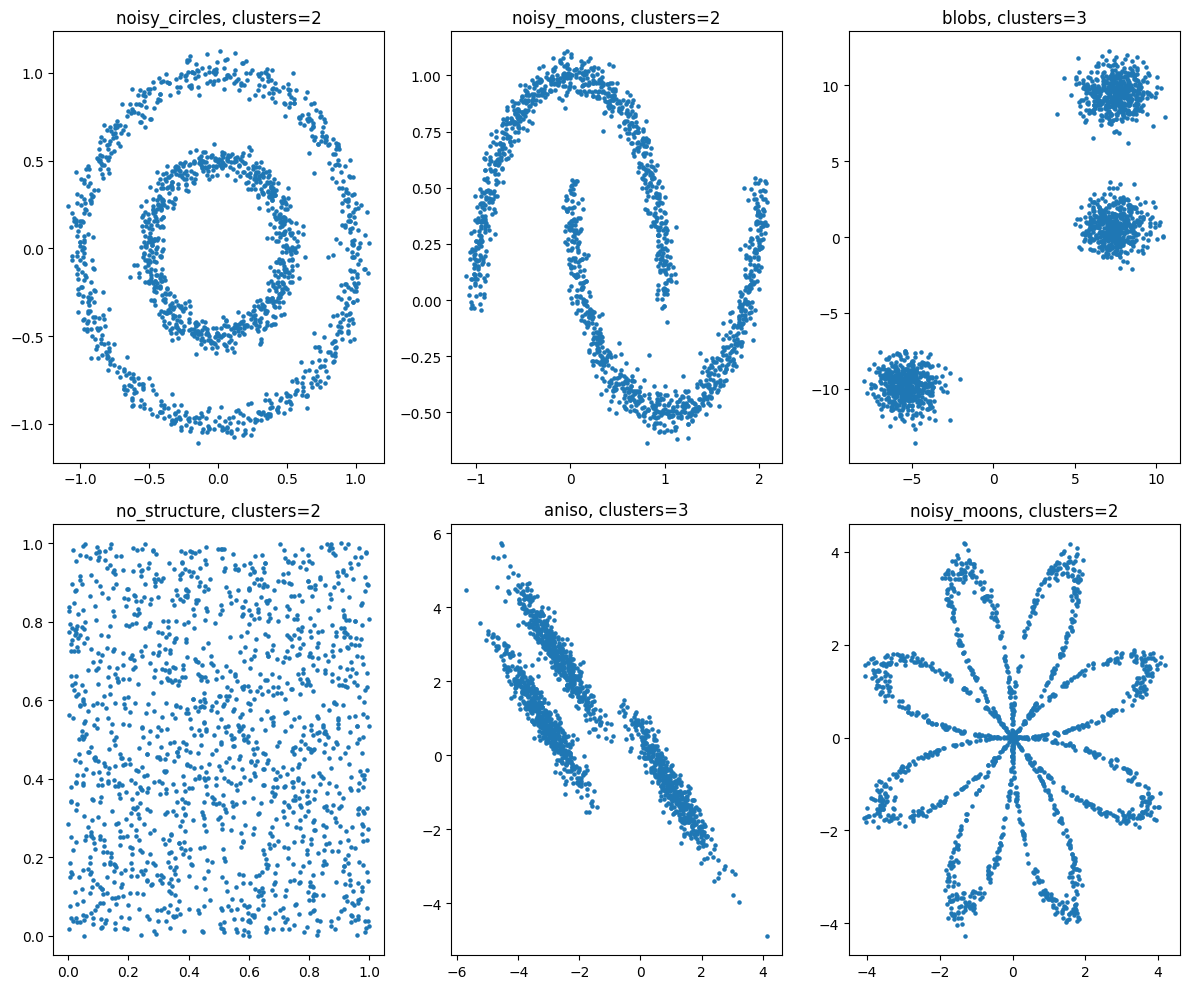

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs[0][0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1],  s=5)
axs[0][0].set_title("noisy_circles, clusters=2")

axs[0][1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1],  s=5)
axs[0][1].set_title("noisy_moons, clusters=2")

axs[0][2].scatter(blobs[0][:, 0], blobs[0][:, 1],  s=5)
axs[0][2].set_title("blobs, clusters=3")

axs[1][0].scatter(no_structure[0][:, 0], no_structure[0][:, 1],  s=5)
axs[1][0].set_title("no_structure, clusters=2")

axs[1][1].scatter(aniso[0][:, 0], aniso[0][:, 1],  s=5)
axs[1][1].set_title("aniso, clusters=3")

axs[1][2].scatter(Fw_x[:, 0], Fw_x[:, 1],  s=5)
axs[1][2].set_title("noisy_moons, clusters=2")


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

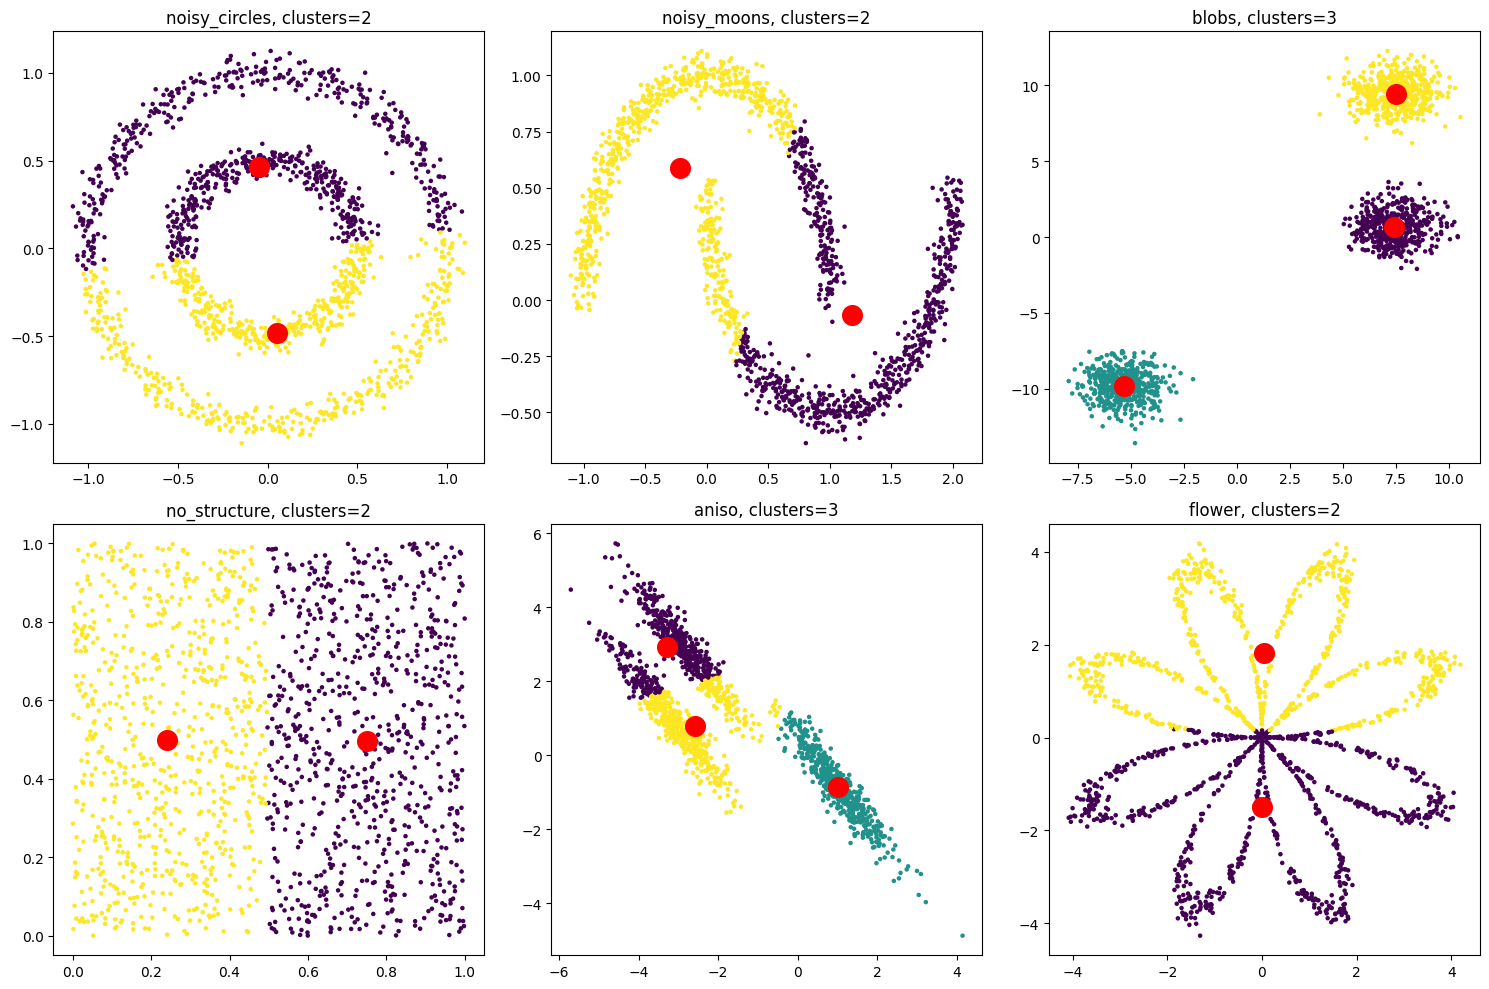

In [ ]:
datasets_with_clusters = [
    ("noisy_circles", noisy_circles[0], 2),
    ("noisy_moons", noisy_moons[0], 2),
    ("blobs", blobs[0], 3),
    ("no_structure", no_structure[0], 2),
    ("aniso", aniso[0], 3),
    ("flower", Fw_x, 2),
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, data, n_clusters) in enumerate(datasets_with_clusters):
    ax = axs[idx // 3][idx % 3]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    ax.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=5)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
    ax.set_title(f"{name}, clusters={n_clusters}")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# prompt: 使用DBSCAN演算法，並根據不同的分群數量，將上述6種資料進行分群，並顯示分群後的結果。

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# ... (previous code remains the same)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, data, n_clusters) in enumerate(datasets_with_clusters):
    ax = axs[idx // 3][idx % 3]

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.3, min_samples=5) # Adjust eps and min_samples as needed
    clusters = dbscan.fit_predict(data)

    # Plotting
    unique_labels = set(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (clusters == k)

        xy = data[class_member_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=5)

    ax.set_title(f"{name}, DBSCAN")

plt.tight_layout()
plt.show()

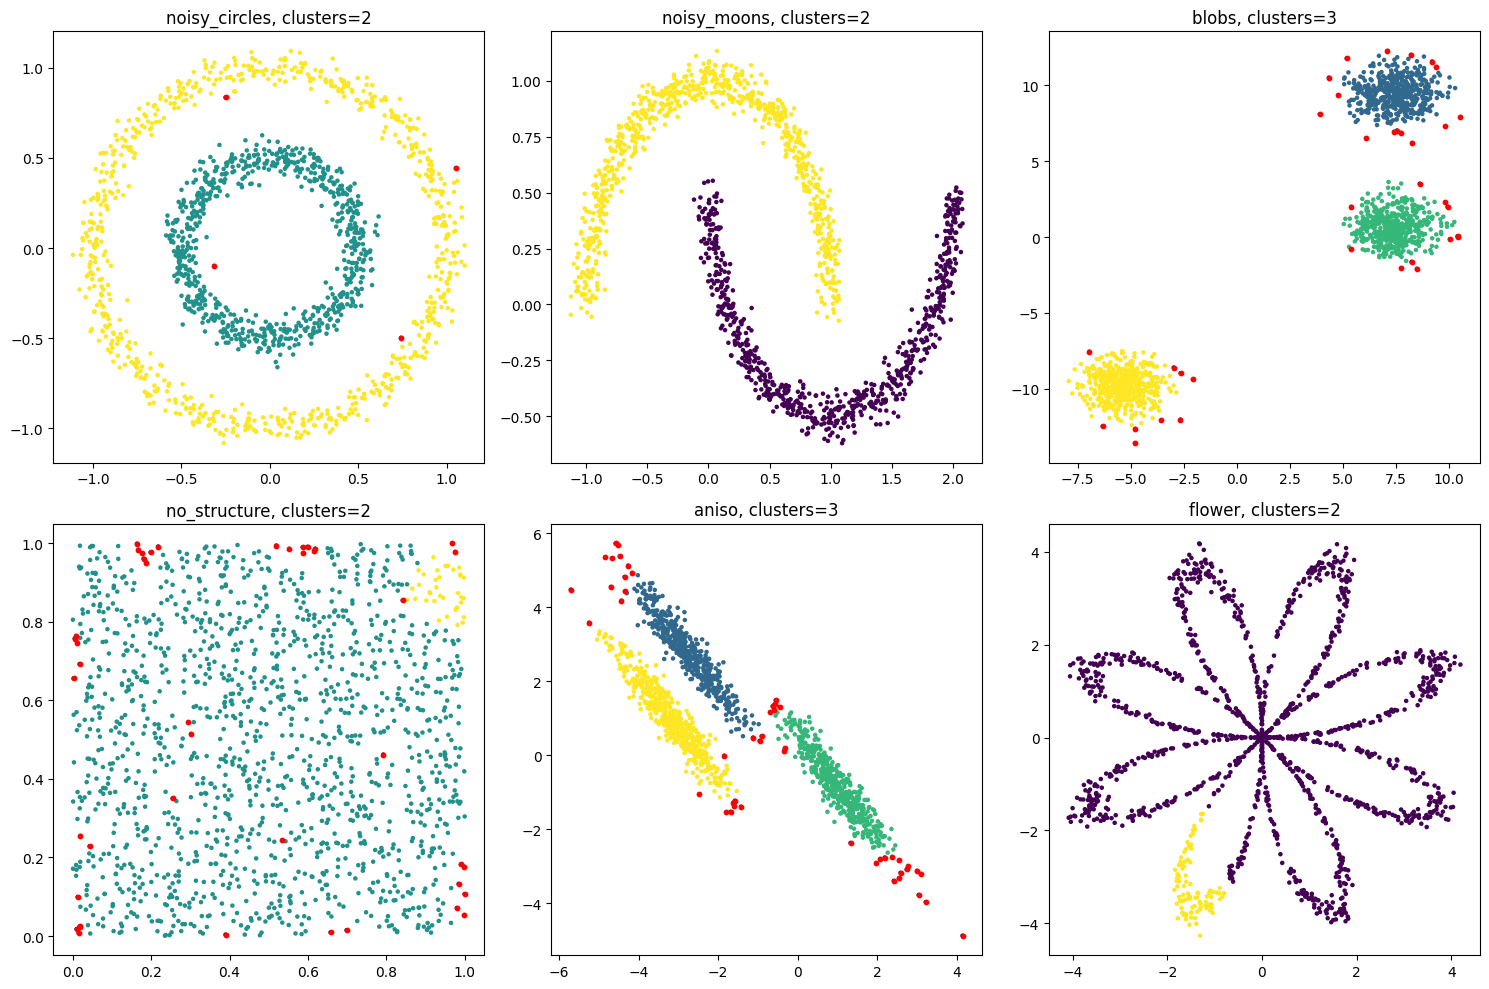

In [ ]:
datasets_and_params = [
    ("noisy_circles", noisy_circles[0], {"eps": 0.1, "min_samples": 15}),
    ("noisy_moons", noisy_moons[0], {"eps": 0.1, "min_samples": 15}),
    ("blobs", blobs[0], {"eps": 0.5, "min_samples": 5}),
    ("no_structure", no_structure[0], {"eps": 0.08, "min_samples": 30}),
    ("aniso", aniso[0], {"eps": 0.3, "min_samples": 10}),
    ("flower", Fw_x, {"eps": 0.3, "min_samples": 5}),
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, (name, data, params) in enumerate(datasets_and_params):
    ax = axs[idx // 3][idx % 3]
    dbscan = DBSCAN(**params)
    clusters = dbscan.fit_predict(data)
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    scatter = ax.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=5)
    ax.set_title(f"{name}, clusters={num_clusters}")
    noise_points = data[clusters == -1]
    if len(noise_points) > 0:
        ax.scatter(noise_points[:, 0], noise_points[:, 1], c="red", s=10, label="Noise")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import load_iris

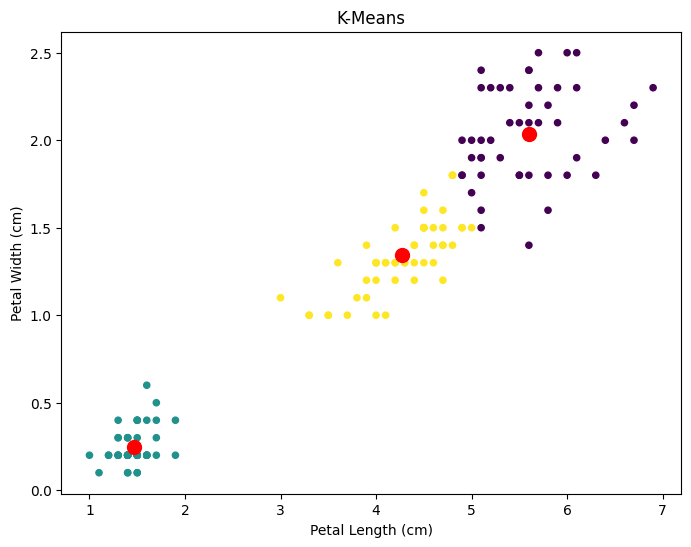

In [ ]:
iris = load_iris()
X = iris.data[:, 2:4]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100)
plt.title("K-Means")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


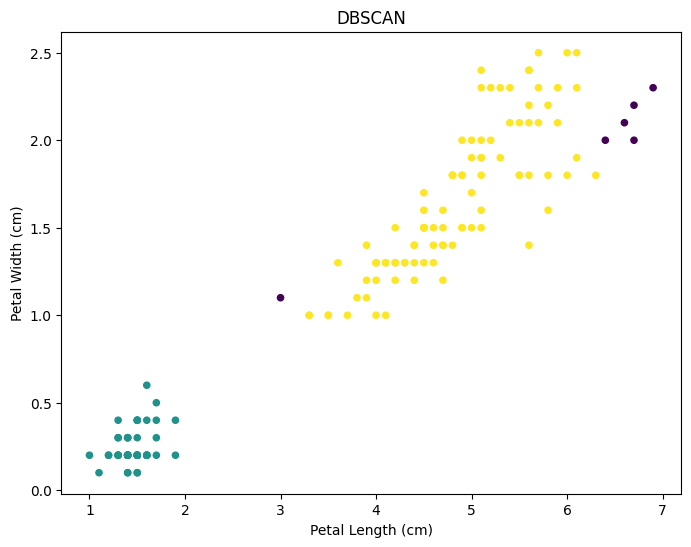

In [ ]:
iris = load_iris()
X = iris.data[:, 2:4]
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title('DBSCAN')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()